## Observations and Insights 

In [231]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
df=pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview

df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [227]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [163]:
# Checking the number of mice.
df["Mouse ID"].count()

1893

In [164]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df[df.duplicated(['Mouse ID',"Timepoint"], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [165]:
# Optional: Get all the data for the duplicate mouse ID. 



In [166]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df=df.drop_duplicates(subset=["Mouse ID","Timepoint"])

In [167]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].count()

1888

## Summary Statistics

In [289]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

df_group=df.groupby(["Drug Regimen"])
mean=df_group["Tumor Volume (mm3)"].mean()
median=df_group["Tumor Volume (mm3)"].median()
variance=df_group["Tumor Volume (mm3)"].var()
sd=df_group["Tumor Volume (mm3)"].std()
sem=df_group["Tumor Volume (mm3)"].sem()

summary=pd.DataFrame({"mean":mean,
                      "median": median,
                      "variance": variance,
                      "standard deviation": sd,
                      "standard error of the mean": sem})
summary=summary.reset_index()
summary

,Drug Regimen,mean,median,variance,standard deviation,standard error of the mean
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [299]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
a=df_group["Tumor Volume (mm3)"].aggregate(['mean', 'median','var','std','sem'])
a=a.rename(columns={"var": "variance", "std": "standard deviation", "sem": "standard error of the mean"})
a.reset_index()
# Using the aggregation method, produce the same summary statistics in a single line


,Drug Regimen,mean,median,variance,standard deviation,standard error of the mean
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

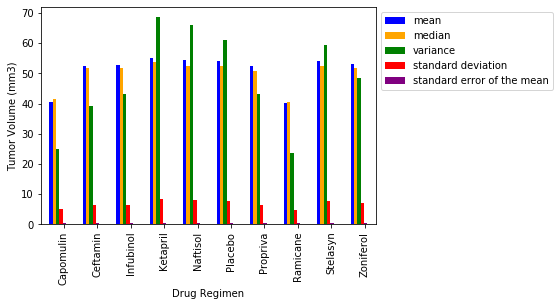

In [170]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
a=summary.plot.bar(color=["blue","orange","green","red","purple"])
a.legend(bbox_to_anchor=(1.0, 1.0))
a.set_ylabel('Tumor Volume (mm3)')
a.set_xticks(x + width + width/2)
a.set_xticklabels(x_labels)
a.set_xlabel('Drug Regimen')
a.legend(bbox_to_anchor=(1.0, 1.0))

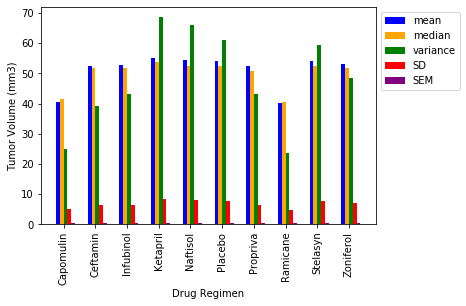

In [172]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
length = len(summary["Drug Regimen"])
x_labels = summary["Drug Regimen"]

fig, ax = plt.subplots()
width = 0.12 # width of bar
x = np.arange(length)

ax.bar(x, summary["mean"], width, color='blue', label='mean')
ax.bar(x + width, summary["median"], width, color='orange', label='median')
ax.bar(x + (2 * width), summary["variance"], width, color='green', label='variance')
ax.bar(x + (3 * width), summary["standard deviation"], width, color='red', label='SD')
ax.bar(x + (4 * width), summary["standard error of the mean"], width, color='purple', label='SEM')



ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Drug Regimen')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=90)
plt.show()

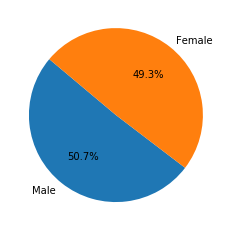

In [173]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
a=df["Sex"].value_counts()
b=a.plot.pie(figsize=(4, 4),autopct='%1.1f%%', startangle=140)
b.yaxis.set_visible(False)
plt.show()

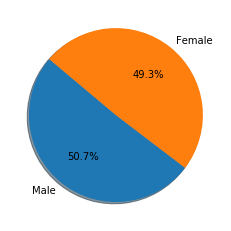

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

a=df["Sex"].value_counts()

plt.pie(a,labels=["Male","Female"],autopct="%1.1f%%", shadow=True, startangle=140)

plt.show() 

## Quartiles, Outliers and Boxplots

In [237]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

df3=df.loc[(df["Drug Regimen"]=="Capomulin")|(df["Drug Regimen"]=="Ramicane")|(df["Drug Regimen"]=="Infubinol")|
           (df["Drug Regimen"]=="Ceftamin")]

df3.head()
# Start by getting the last (greatest) timepoint for each mouse
df4=df3.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max()
df4=pd.DataFrame(df4)
df4.reset_index(inplace=True)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df5=pd.merge(df3,df4,on=["Mouse ID","Drug Regimen","Timepoint"])
df5

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [255]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=[x for x in df5["Drug Regimen"].unique()]
treatment


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#first create an empty dataframe, if there is an outlier, the entire row will be appended to this dataframe

outlier=pd.DataFrame()
for x in treatment:
    tumor_vol=df5.loc[(df5["Drug Regimen"]==x),:]
    quartiles = tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier.append(tumor_vol.loc[(tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (tumor_vol['Tumor Volume (mm3)'] > upper_bound)])
    outlier

## there is no outlier since the outlier dataframe is still empty after the for loop


Text(0, 0.5, 'Tumor Volume (mm3)')

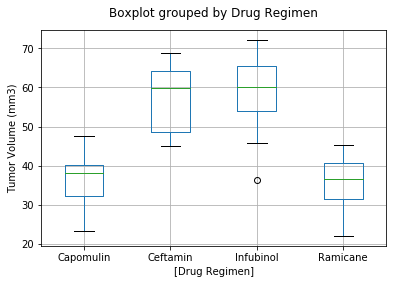

In [256]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
df5.boxplot(column=['Tumor Volume (mm3)'], by=['Drug Regimen'])
plt.title("")
plt.ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

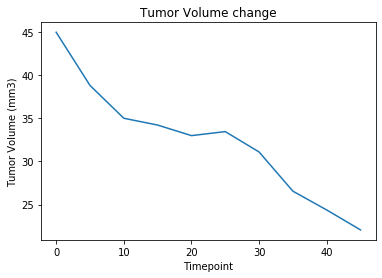

In [257]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df6=df.loc[(df["Mouse ID"]=="k403")]
plt.plot(df6["Timepoint"],df6["Tumor Volume (mm3)"])
plt.title("Tumor Volume change")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

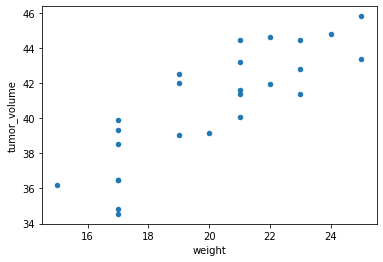

In [282]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df7=df.loc[(df["Drug Regimen"]=="Capomulin")]
df8=df7.groupby("Mouse ID")
df8=df8.mean()
weight=df8["Weight (g)"]
tumor_v=df8["Tumor Volume (mm3)"]
plot_df=pd.DataFrame({"weight": weight,
                      "tumor_volume": tumor_v})
plot_df.plot.scatter(x="weight",y="tumor_volume")

## Correlation and Regression

In [284]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,tumor_v)
print(f"The correlation between weigth and average tumor volume is {round(correlation[0],2)}")

The correlation between weigth and average tumor volume is 0.84
